**Proyek Analisis Data: [Bike Sharing Dataset]**
**Nama: [Nenda Maulin Kurniati]**
**Email: [nendamaulinkurniati@gmail.com]**
**ID Dicoding: [nendamk4]**

**Menentukan Pertanyaan Bisnis**
1. Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
2. Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda?

**Import Semua Packages/Library yang Digunakan**

In [1]:
#Jika dijalankan di Juypter Notebook Bisa Tidak ada error
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
from scipy import stats  # type: ignore

**DATA WRANGLING**

**Gathering Data**

In [2]:
day_df = pd.read_csv("C:\\Users\\nenda\\Downloads\\data\\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("C:\\Users\\nenda\\Downloads\\data\\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insigth**
1. Memunculkan data

**Assessing Data**

**Menilai Data day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Menilai Data hour_df**

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**
1. Melihat Tipe Data
2. Mencari Duplikasi Data

**Cleaning Data**

**Memperbaiki Type Data Tabel day_df**

In [13]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Memperbaiki Type Data Tabel hour_df**

In [15]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insigth**
1. Memperbaiki tipe data yang salah

**VISUALIZATION & EXPLORATORY ANALYSIS(EDA)**

In [17]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight**

Memperlihatkan semua data day_df 

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**

Memperlihatkan semua data hour_df

**1. Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?**

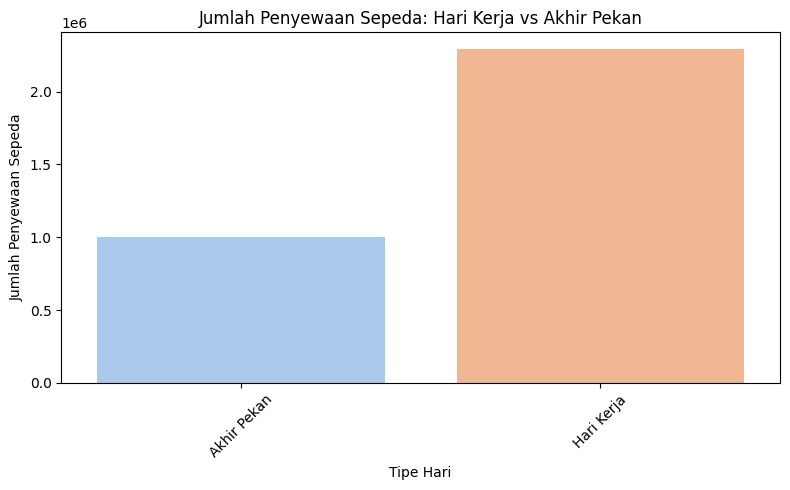

Statistik t: 1.6543102137118633
Nilai p: 0.09849496160024913
Tidak terdapat perbedaan signifikan antara jumlah penyewaan sepeda di hari kerja dan akhir pekan.


In [23]:
# Load dataset
df = pd.read_csv("C:\\Users\\nenda\\Downloads\\data\\day.csv")

# Klasifikasikan hari sebagai "Hari Kerja" atau "Akhir Pekan"
df['day_type'] = df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')

# Hitung jumlah penyewa berdasarkan day_type
summary = df.groupby('day_type')['cnt'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='cnt', data=summary, hue='day_type', palette='pastel', dodge=False, legend=False)
plt.title('Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Uji statistik (t-test)
hari_kerja = df[df['day_type'] == 'Hari Kerja']['cnt']
akhir_pekan = df[df['day_type'] == 'Akhir Pekan']['cnt']

t_stat, p_value = stats.ttest_ind(hari_kerja, akhir_pekan)

# Hasil uji t
print("Statistik t:", t_stat)
print("Nilai p:", p_value)

# Menentukan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara jumlah penyewaan sepeda di hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan signifikan antara jumlah penyewaan sepeda di hari kerja dan akhir pekan.")


**2. Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda?**

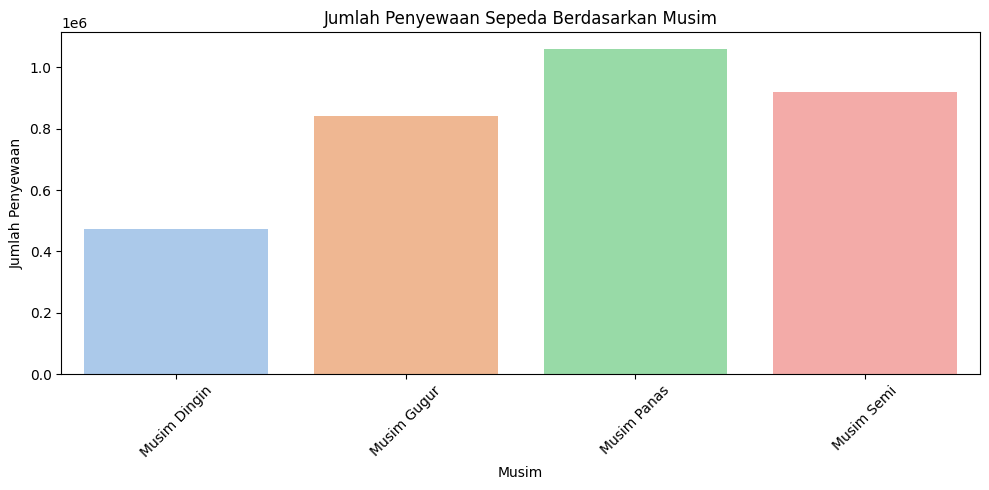

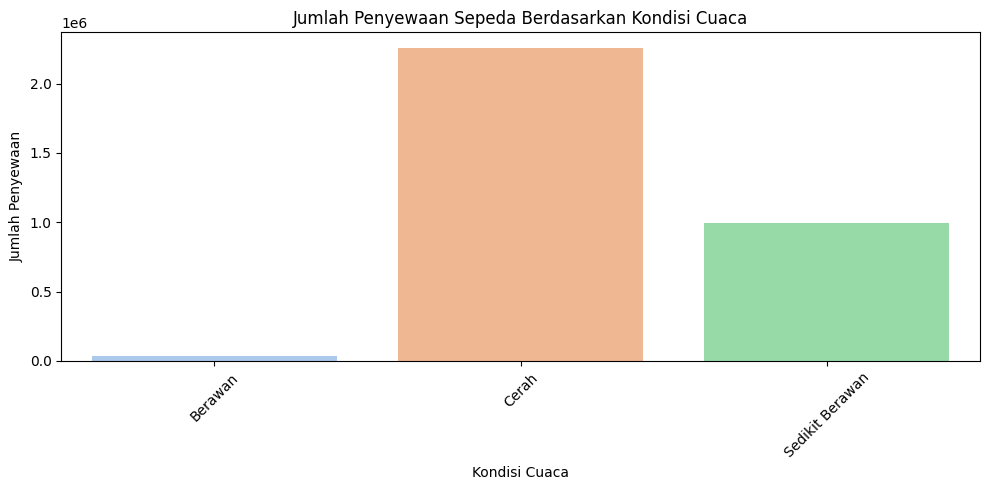

Musim dan kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda.
Jumlah penyewaan tertinggi terjadi selama musim panas dan ketika cuaca cerah,
sementara musim dingin dan cuaca berawan cenderung menurunkan aktivitas bersepeda.


In [24]:
import pandas as pd # type: ignore 
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Load dataset
df = pd.read_csv("C:\\Users\\nenda\\Downloads\\data\\day.csv")

# Mengklasifikasikan musim
seasons = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
df['season_name'] = df['season'].map(seasons)

# Mengklasifikasikan cuaca
weather_conditions = {1: 'Cerah', 2: 'Sedikit Berawan', 3: 'Berawan', 4: 'Hujan'}
df['weather_name'] = df['weathersit'].map(weather_conditions)

# Menghitung jumlah penyewaan berdasarkan musim
season_summary = df.groupby('season_name')['cnt'].sum().reset_index()

# Menghitung jumlah penyewaan berdasarkan kondisi cuaca
weather_summary = df.groupby('weather_name')['cnt'].sum().reset_index()

# Visualisasi jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 5))
sns.barplot(x='season_name', y='cnt', data=season_summary, palette='pastel', hue='season_name', dodge=False)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi jumlah penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))
sns.barplot(x='weather_name', y='cnt', data=weather_summary, palette='pastel', hue='weather_name', dodge=False)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight Analisis
print("Musim dan kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda.")
print("Jumlah penyewaan tertinggi terjadi selama musim panas dan ketika cuaca cerah,")
print("sementara musim dingin dan cuaca berawan cenderung menurunkan aktivitas bersepeda.")


**CONCLUTION**

Conclution 1: 
Tidak terdapat perbedaan signifikan antara jumlah penyewaan sepeda di hari kerja dan akhir pekan. (Karena nilai p > alpha)

Conclution 2:
Musim dan kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda. Jumlah penyewaan tertinggi terjadi selama musim panas dan ketika cuaca cerah, sementara musim dingin dan cuaca berawan cenderung menurunkan aktivitas bersepeda.